In [36]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy

In [60]:
df = pd.read_excel('C:/Users/shubh/Desktop/project.xlsx','Sheet2')
df

,State,District,Rural /urban classification,"Sex ratio of the total population (females per 1,000 males)",Sex ratio at birth for children born in the last five years,Women who are literate (%),Men who are literate (%),Women with 10 or more years of schooling (%),Households with an improved drinking-water source1 (%),Households using improved sanitation facility2 (%),Households using clean fuel for cooking3,Quality of life indicator,Institutional births (%)
0,PUNJAB,Amritsar,both,916,772,78.5,85.0,53.1,100.0,78.3,72.8,0.655296,90.0
1,PUNJAB,Barnala,both,873,1026,77.1,80.6,46.0,98.9,85.5,54.4,0.499831,96.3
2,PUNJAB,Bathinda,both,914,991,76.2,88.6,50.8,96.7,85.0,62.7,0.339062,94.7
3,PUNJAB,Faridkot,both,888,968,76.9,83.9,50.3,97.3,83.7,64.2,0.392529,95.5
4,PUNJAB,"Fatehgarh Sahib,",both,927,872,88.4,95.2,58.5,99.5,83.0,69.4,0.647418,94.3
5,PUNJAB,Firozpur,rural,907,1014,67.7,82.4,34.5,99.7,96.8,77.1,0.939772,86.0
6,PUNJAB,Gurdaspur,rural,898,829,88.2,90.4,62.7,99.6,74.7,69.8,0.535656,87.3
7,PUNJAB,Hoshiarpur,rural,943,894,90.4,81.7,64.3,99.8,76.2,62.7,0.519463,91.3
8,PUNJAB,Jalandhar,both,953,711,89.1,90.5,68.6,99.8,89.2,78.7,0.848542,95.7
9,PUNJAB,Kapurthala,both,958,776,87.1,87.3,59.8,98.8,81.8,76.1,0.614306,91.2


In [61]:
df['sex ratio scaled'] = (df['Sex ratio of the total population (females per 1,000 males)'] - min(df['Sex ratio of the total population (females per 1,000 males)']))/(max(df['Sex ratio of the total population (females per 1,000 males)'])-min(df['Sex ratio of the total population (females per 1,000 males)']))
df['Child sex ratio scaled'] = 2*(df['Sex ratio at birth for children born in the last five years'] - min(df['Sex ratio at birth for children born in the last five years']))/(max(df['Sex ratio at birth for children born in the last five years'])-min(df['Sex ratio at birth for children born in the last five years']))
df['Mens Literacy rate scaled'] = ((df['Men who are literate (%)'] - min(df['Men who are literate (%)']))/(max(df['Men who are literate (%)'])-min(df['Men who are literate (%)'])))
df['Womens Literacy rate scaled'] = (df['Women who are literate (%)'] - min(df['Women who are literate (%)']))/(max(df['Women who are literate (%)'])-min(df['Women who are literate (%)']))
df['Women with > 10 years of schooling scaled'] = (df['Women with 10 or more years of schooling (%)'] - min(df['Women with 10 or more years of schooling (%)']))/(max(df['Women with 10 or more years of schooling (%)'])-min(df['Women with 10 or more years of schooling (%)']))
df['Institutional births'] = (df['Institutional births (%)'] - min(df['Institutional births (%)']))/(max(df['Institutional births (%)'])-min(df['Institutional births (%)']))


In [62]:

df.loc[df['Rural /urban classification'] == 'rural', 'ruc1'] = .5
df.loc[df['Rural /urban classification'] != 'rural', 'ruc1'] = 0
df.loc[df['Rural /urban classification'] == 'urban', 'ruc2'] = .5
df.loc[df['Rural /urban classification'] != 'urban', 'ruc2'] = 0
#df.loc[df['Rural /urban classification'] == 'both', 'ruc3'] = 1 # dummy variable trap.if its both then it automatically becomes 0
#df.loc[df['Rural /urban classification'] != 'both', 'ruc3'] = 0
Scale_df = df[['District','ruc1','ruc2','sex ratio scaled','Child sex ratio scaled','Mens Literacy rate scaled','Womens Literacy rate scaled',
            'Women with > 10 years of schooling scaled','Quality of life indicator','Institutional births']]
Scale_df 
((Scale_df['Mens Literacy rate scaled'] - Scale_df['Mens Literacy rate scaled'].mean() ) * (Scale_df['sex ratio scaled'] - Scale_df['sex ratio scaled'].mean() ) ).mean()/(Scale_df['Mens Literacy rate scaled'].var())

0.30553479991426663

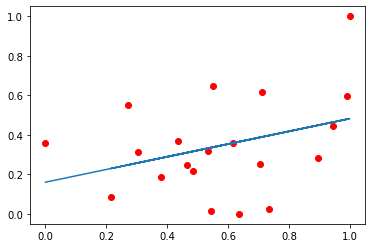

In [63]:

#plt.plot(Scale_df['sex ratio scaled'], Scale_df['Mens Literacy rate scaled'])
plt.scatter(Scale_df['Mens Literacy rate scaled'], Scale_df['sex ratio scaled'], c ='Red')
lm = (Scale_df['Mens Literacy rate scaled']*(Scale_df.corr().loc['Mens Literacy rate scaled','sex ratio scaled'])*(Scale_df['sex ratio scaled'].var())**.5)/(Scale_df['Mens Literacy rate scaled'].var())**.5
z= (Scale_df['sex ratio scaled'] - lm).mean()
lm = lm + z
z= (Scale_df['sex ratio scaled'] - lm)

plt.plot(Scale_df['Mens Literacy rate scaled'],lm)

In [90]:
z= (Scale_df['sex ratio scaled'] - lm)
y = ((Scale_df['sex ratio scaled'].var())- ((z**2)/20)).mean()/(Scale_df['sex ratio scaled'].var())
p_value = scipy.stats.f.cdf(y, 20, 20)
p_value

0.4230770177132744

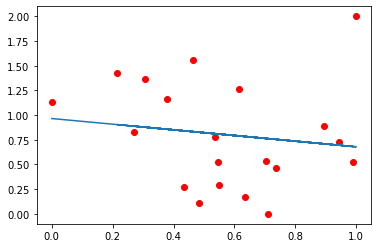

In [65]:
plt.scatter(Scale_df['Mens Literacy rate scaled'], Scale_df['Child sex ratio scaled'], c ='Red')
lm = (Scale_df['Mens Literacy rate scaled']*(Scale_df.corr().loc['Mens Literacy rate scaled','Child sex ratio scaled'])*(Scale_df['Child sex ratio scaled'].var())**.5)/(Scale_df['Mens Literacy rate scaled'].var())**.5
z= (Scale_df['Child sex ratio scaled'] - lm).mean()
lm = lm + z
plt.plot(Scale_df['Mens Literacy rate scaled'],lm)

In [66]:
z= (Scale_df['Child sex ratio scaled'] - lm)
y = ((Scale_df['Child sex ratio scaled'].var())- ((z**2)/20)).mean()/((z**2)/20).mean()
p_value = scipy.stats.f.cdf(y, 20, 20)
p_value

0.9999999970084

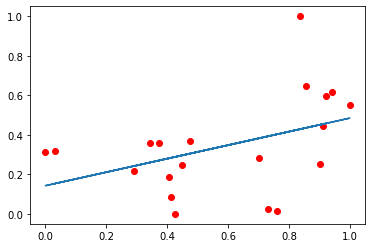

In [67]:
plt.scatter(Scale_df['Womens Literacy rate scaled'], Scale_df['sex ratio scaled'], c ='Red')
lm = (Scale_df['Womens Literacy rate scaled']*(Scale_df.corr().loc['Womens Literacy rate scaled','sex ratio scaled'])*(Scale_df['sex ratio scaled'].var())**.5)/(Scale_df['Womens Literacy rate scaled'].var())**.5
z= (Scale_df['sex ratio scaled'] - lm).mean()
lm = lm + z
plt.plot(Scale_df['Womens Literacy rate scaled'],lm)

In [68]:
z= (Scale_df['sex ratio scaled'] - lm)
y = ((Scale_df['sex ratio scaled'].var())- ((z**2)/20)).mean()/((z**2)/20).mean()
p_value = scipy.stats.f.cdf(y, 20, 20)
p_value

0.9999999994439845

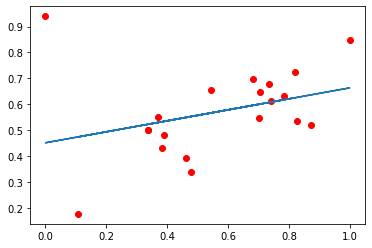

In [69]:
plt.scatter(Scale_df['Women with > 10 years of schooling scaled'], Scale_df['Quality of life indicator'], c ='Red')
lm = (Scale_df['Women with > 10 years of schooling scaled']*(Scale_df.corr().loc['Women with > 10 years of schooling scaled','Quality of life indicator'])*(Scale_df['Quality of life indicator'].var())**.5)/((Scale_df['Women with > 10 years of schooling scaled'].var())**.5)
z= (Scale_df['Quality of life indicator'] - lm).mean()
lm = lm + z
plt.plot(Scale_df['Women with > 10 years of schooling scaled'],lm)

In [70]:
z= (Scale_df['Quality of life indicator'] - lm)
y = ((Scale_df['Quality of life indicator'].var())- ((z**2)/20)).mean()/((z**2)/20).mean()
p_value = scipy.stats.f.cdf(y, 20, 20)
p_value

0.999999998758178

In [71]:
Scale_df.corr()

,ruc1,ruc2,sex ratio scaled,Child sex ratio scaled,Mens Literacy rate scaled,Womens Literacy rate scaled,Women with > 10 years of schooling scaled,Quality of life indicator,Institutional births
ruc1,1.000000,NaN,0.168128,0.187190,-0.121541,-0.229739,-0.336186,-0.233033,-0.300961
ruc2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sex ratio scaled,0.168128,NaN,1.000000,0.214411,0.346817,0.420751,0.343012,0.123657,0.180446
Child sex ratio scaled,0.187190,NaN,0.214411,1.000000,-0.141514,-0.258038,-0.379338,-0.159976,0.196390
Mens Literacy rate scaled,-0.121541,NaN,0.346817,-0.141514,1.000000,0.534940,0.504899,0.160537,0.154098
Womens Literacy rate scaled,-0.229739,NaN,0.420751,-0.258038,0.534940,1.000000,0.958881,0.329006,0.073014
Women with > 10 years of schooling scaled,-0.336186,NaN,0.343012,-0.379338,0.504899,0.958881,1.000000,0.324970,0.026344
Quality of life indicator,-0.233033,NaN,0.123657,-0.159976,0.160537,0.329006,0.324970,1.000000,-0.270219
Institutional births,-0.300961,NaN,0.180446,0.196390,0.154098,0.073014,0.026344,-0.270219,1.000000


In [72]:
(Scale_df.corr().loc['Mens Literacy rate scaled','sex ratio scaled'])*((Scale_df['sex ratio scaled'].var())**.5)/(Scale_df['Mens Literacy rate scaled'].var())**.5

0.32161557885712283

In [73]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [74]:
x= Scale_df.loc[:,['ruc1','ruc2','Mens Literacy rate scaled','Womens Literacy rate scaled','Quality of life indicator','Institutional births']]
y= Scale_df.loc[:,['sex ratio scaled']]

In [75]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2, random_state = 0)
x_test


,ruc1,ruc2,Mens Literacy rate scaled,Womens Literacy rate scaled,Quality of life indicator,Institutional births
18,0.5,0.0,1.000,0.837004,0.547837,0.645833
1,0.0,0.0,0.215,0.414097,0.499831,0.958333
19,0.5,0.0,0.000,0.343612,0.502131,0.555556
8,0.0,0.0,0.710,0.942731,0.848542,0.916667


In [76]:
regressor1 = LinearRegression()
regressor1.fit(x_train,y_train)

LinearRegression()

In [77]:
z=(max(df['Sex ratio of the total population (females per 1,000 males)'])-min(df['Sex ratio of the total population (females per 1,000 males)']))
a = min(df['Sex ratio of the total population (females per 1,000 males)'])
a
y_pred = regressor1.predict(x_test)

In [78]:

np.set_printoptions(precision = 2)
print(np.concatenate(((y_pred*z*0.5)+a,(y_test*z*0.5)+a),1))

[[886.6  935.5 ]
 [888.89 866.5 ]
 [887.77 887.  ]
 [896.12 906.5 ]]


In [79]:
x = ((((y_pred - y_test)*(z))**2)**0.5)
x.mean()/((y_test * z)+a).mean()# root mean square error

sex ratio scaled    0.043955
dtype: float64

In [80]:

x = abs(((y_pred - y_test)*(z)))
x.mean()/((y_test * z)+a).mean()

sex ratio scaled    0.043955
dtype: float64

In [81]:
var_total = Scale_df[['sex ratio scaled']].var() + Scale_df[['Child sex ratio scaled']].var() + Scale_df[['Mens Literacy rate scaled']].var()+Scale_df[['Womens Literacy rate scaled']].var()+Scale_df[['Women with > 10 years of schooling scaled']].var()+Scale_df[['Quality of life indicator']].var()+Scale_df[['Institutional births']].var()+Scale_df[['ruc2']].var()+Scale_df[['ruc1']].var()
var_total =  Scale_df[['Child sex ratio scaled']].var()
var_total

Child sex ratio scaled    0.293664
dtype: float64

Text(0, 0.5, 'wcss')

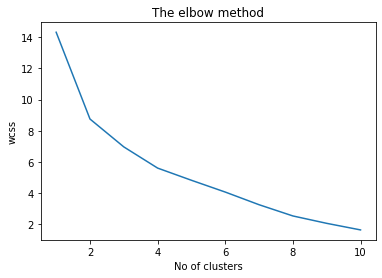

In [82]:
df_clustering = Scale_df[['ruc1','ruc2','sex ratio scaled','Child sex ratio scaled','Mens Literacy rate scaled','Womens Literacy rate scaled',
            'Women with > 10 years of schooling scaled','Quality of life indicator','Institutional births']].values
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df_clustering)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The elbow method')
plt.xlabel('No of clusters')
plt.ylabel('wcss')


In [83]:
kmeans2 = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
kmeans1 = KMeans(n_clusters = 1, init = 'k-means++', random_state = 43)
y_kmeans = kmeans2.fit_predict(df_clustering)
kmeans1.fit(df_clustering)
wcss2 = kmeans2.inertia_
wcss1 = kmeans1.inertia_
y_kmeans


array([2, 4, 4, 4, 2, 3, 2, 2, 2, 2, 2, 1, 4, 1, 2, 2, 2, 1, 0, 4])

In [84]:
from pandas import Series, DataFrame
ser1 = DataFrame(y_kmeans)
ser1
Scale_df = pd.merge(Scale_df, ser1, left_index=True, right_index=True)
Scale_df

,District,ruc1,ruc2,sex ratio scaled,Child sex ratio scaled,Mens Literacy rate scaled,Womens Literacy rate scaled,Women with > 10 years of schooling scaled,Quality of life indicator,Institutional births,0
0,Amritsar,0.0,0.0,0.370861,0.275395,0.435,0.475771,0.545455,0.655296,0.520833,2
1,Barnala,0.0,0.0,0.086093,1.422122,0.215,0.414097,0.337243,0.499831,0.958333,4
2,Bathinda,0.0,0.0,0.357616,1.264108,0.615,0.374449,0.478006,0.339062,0.847222,4
3,Faridkot,0.0,0.0,0.185430,1.160271,0.380,0.405286,0.463343,0.392529,0.902778,4
4,"Fatehgarh Sahib,",0.0,0.0,0.443709,0.726862,0.945,0.911894,0.703812,0.647418,0.819444,2
5,Firozpur,0.5,0.0,0.311258,1.367946,0.305,0.000000,0.000000,0.939772,0.243056,3
6,Gurdaspur,0.5,0.0,0.251656,0.532731,0.705,0.903084,0.826979,0.535656,0.333333,2
7,Hoshiarpur,0.5,0.0,0.549669,0.826185,0.270,1.000000,0.873900,0.519463,0.611111,2
8,Jalandhar,0.0,0.0,0.615894,0.000000,0.710,0.942731,1.000000,0.848542,0.916667,2
9,Kapurthala,0.0,0.0,0.649007,0.293454,0.550,0.854626,0.741935,0.614306,0.604167,2


In [85]:
Scale_df.rename(columns = {0: "Cluster Group"}, inplace = True)
df2 = Scale_df. groupby("Cluster Group")["sex ratio scaled","Quality of life indicator","Child sex ratio scaled"].mean()
df3 =  df2.sort_values(by='Child sex ratio scaled')
b= 0
c = df3.index
c
districs_of_concern = Scale_df.loc[(Scale_df['Cluster Group'] ==c[0])| (Scale_df['Cluster Group'] ==c[1])]
districs_of_concern       



<ipython-input-85-3548ce829b24>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df2 = Scale_df. groupby("Cluster Group")["sex ratio scaled","Quality of life indicator","Child sex ratio scaled"].mean()


,District,ruc1,ruc2,sex ratio scaled,Child sex ratio scaled,Mens Literacy rate scaled,Womens Literacy rate scaled,Women with > 10 years of schooling scaled,Quality of life indicator,Institutional births,Cluster Group
0,Amritsar,0.0,0.0,0.370861,0.275395,0.435,0.475771,0.545455,0.655296,0.520833,2
4,"Fatehgarh Sahib,",0.0,0.0,0.443709,0.726862,0.945,0.911894,0.703812,0.647418,0.819444,2
6,Gurdaspur,0.5,0.0,0.251656,0.532731,0.705,0.903084,0.826979,0.535656,0.333333,2
7,Hoshiarpur,0.5,0.0,0.549669,0.826185,0.270,1.000000,0.873900,0.519463,0.611111,2
8,Jalandhar,0.0,0.0,0.615894,0.000000,0.710,0.942731,1.000000,0.848542,0.916667,2
9,Kapurthala,0.0,0.0,0.649007,0.293454,0.550,0.854626,0.741935,0.614306,0.604167,2
10,Ludhiana,0.0,0.0,0.013245,0.523702,0.545,0.762115,0.821114,0.726254,0.000000,2
11,Mansa,0.5,0.0,0.317881,0.781038,0.535,0.030837,0.108504,0.176242,0.611111,1
13,Muktsar,0.5,0.0,0.000000,0.167043,0.635,0.427313,0.384164,0.431371,0.770833,1
14,Patiala,0.0,0.0,0.284768,0.893905,0.895,0.700441,0.683284,0.698541,1.000000,2


In [86]:
K_NN = districs_of_concern.mean()
K_NN = DataFrame(K_NN)
l = len(K_NN)
K_NN = K_NN.T
K_NN

,ruc1,ruc2,sex ratio scaled,Child sex ratio scaled,Mens Literacy rate scaled,Womens Literacy rate scaled,Women with > 10 years of schooling scaled,Quality of life indicator,Institutional births,Cluster Group
0,0.230769,0.0,0.333673,0.471262,0.648846,0.68858,0.661178,0.587863,0.586538,1.769231


In [87]:
df2 = Scale_df. groupby("Cluster Group")["sex ratio scaled","Quality of life indicator","Child sex ratio scaled"].median()
df2

    

<ipython-input-87-e8d196f0803c>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df2 = Scale_df. groupby("Cluster Group")["sex ratio scaled","Quality of life indicator","Child sex ratio scaled"].median()


,sex ratio scaled,Quality of life indicator,Child sex ratio scaled
Cluster Group,,,
0,1.000000,0.547837,2.000000
1,0.218543,0.431371,0.167043
2,0.407285,0.651357,0.523702
3,0.311258,0.939772,1.367946
4,0.245033,0.499831,1.264108


In [88]:
df2 = (Scale_df. groupby("Cluster Group")["sex ratio scaled","Quality of life indicator","Child sex ratio scaled"].var())**0.5
df2

<ipython-input-88-c508c7b5f427>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df2 = (Scale_df. groupby("Cluster Group")["sex ratio scaled","Quality of life indicator","Child sex ratio scaled"].var())**0.5


,sex ratio scaled,Quality of life indicator,Child sex ratio scaled
Cluster Group,,,
0,NaN,NaN,NaN
1,0.162623,0.163555,0.371120
2,0.233958,0.094169,0.270561
3,NaN,NaN,NaN
4,0.116357,0.087301,0.181583
